# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [30]:
print(df.head())

df.groupby(['gender'])['temperature'].mean()

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64

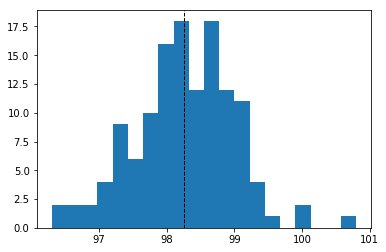

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)


In [42]:
#Question 1: The data seems to have a slight right skew but mostly normal. We only have a sample of 130 which could be afecting our distribution.
# If we had more data points we may get a normal distribution.

plt.hist(x='temperature',bins= 20,data=df)
plt.axvline(df['temperature'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()


p=scipy.stats.normaltest(df['temperature'])
print(p)

In [55]:
#lets test our distribution against a normal distribution

#normal_dist = np.random.normal(df['temperature'].mean(), df['temperature'].std(), size=len(df))
normal = stats.normaltest(df['temperature'])
print(normal)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)


In [46]:
#Question 2: Is the sample size large? Are the observations independent?

In [44]:
len(df)

130

The sample size is > 30 which is large enough for CLT. Samples are taken from other people thus independent.

C:\Users\joelp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


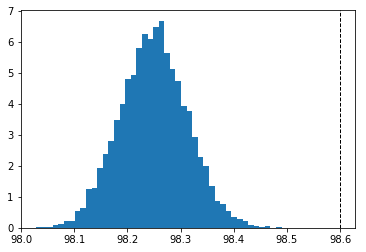

In [48]:
#Question 3: Is the true population mean really 98.6 degrees F?


In [ ]:
# Bootstrap hypothesis test

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

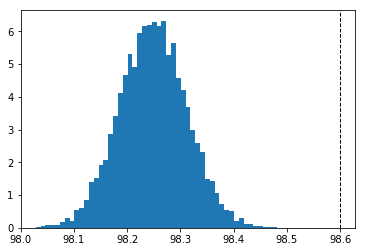

ValueError: Lengths must match to compare

In [79]:
#Making a Graph to show where the mean temperature from Carl Wunderlich's observation is in relation to 10,000 bootstraped 
#replicates from our experimental data

np.random.seed(7)

temp_reps = draw_bs_reps(df['temperature'], np.mean, 10000)

plt.hist(temp_reps,  bins=50, density=True)
plt.axvline(98.6, color='k', linestyle='dashed', linewidth=1)
plt.show()

# Compute fraction of replicates that are less than the observed temperature mean:
p = np.sum(temp_reps <= df['temperature']) / len(translated_replicates)

# Print the p-value:
print('p-value =', p)

In [ ]:
#As is shown in graph 1, the temperature from Carl Wunderlich's data has not shown up on our bootstrapped samples. This gives us a
#p value of >0.0001 which tells us that there is such a small chance of this happening randomly that there must be something else going on
#i.e Carl Wunderlich's data is currently incorrect and the mean temp is closer to 98.25

In [60]:
#Computing the T-test:
# I used a one sided T-test since the data is one set of data is compared to a single value and the population standard deviation is unkown

t_test = stats.ttest_1samp(df['temperature'],98.6)
print('t-statistic:', t_test[0])
print('p-value:', t_test[1])

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07


In [73]:
# Calculate standard error of the mean:
sem = df['temperature'].std()/np.sqrt(len(df['temperature']))

print(sem)

0.06430441683789101


In [76]:
# Calculate and save z-statistic:
z = (df['temperature'].mean() - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.454823292364079
p-value: 4.90215701411338e-08


In [67]:
#4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

#t-test
np.random.seed(7)

sample_10 = np.random.choice(df['temperature'],10)
t_test_sample_10 = stats.ttest_1samp(sample_10,98.6)

print('t-statistic:', t_test_sample_10[0])
print('p-value:', t_test_sample_10[1])

t-statistic: -1.0774675665588005
p-value: 0.30930267921950944


In [69]:
#z-test

# Calculate and save z-statistic:
z_10 = (np.mean(sample_10) - 98.6) / (np.std(sample_10)/np.sqrt(len(sample_10)))

# Calculate and save p-value:
p_10 = stats.norm.cdf(z_10) * 2

# Print the values for z and p:
print('z-statistic:', z_10)
print('p-value:', p_10)

z-statistic: -1.1357505384282938
p-value: 0.25606098283977385
